In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

In [278]:
model = 'population'
submodel = 'test_100'

path = f'../modelling/final_test_models/{model}_results/{submodel}'

In [279]:
if model == 'stars':
    results_path = os.path.join(path, 'stars/results.csv')
elif model == 'population':
    results_path = os.path.join(path, 'population/stars/results.csv')

results = pd.read_csv(results_path)
results.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,83,1.035082,1.230052,1.435582,1033.759339,1218.904338,1218.904338,934.267340,0.946886,1.519524,...,7935.216216,7821.393390,12920.175341,0.042969,0.300205,0.000770,0.000549,0.170531,1.000892,0.068628
1,53,0.627090,0.704980,0.773832,2408.766972,2426.115848,2416.705392,5844.876647,0.550247,0.835136,...,35482.872737,13930.009262,13717.908171,-0.187985,0.080579,0.000381,0.000431,-0.051370,1.001373,0.071859
2,70,1.844107,1.865878,1.892351,4906.473354,4937.449528,4937.449528,8437.730722,1.827053,1.919449,...,12851.924822,12540.070298,12140.807512,0.180924,0.431594,0.000582,0.000417,0.307230,1.000351,0.066024
3,45,0.470117,0.565315,0.648615,3320.868079,3354.565480,3333.222678,7582.426407,0.383051,0.735691,...,18706.348094,14088.583224,6738.258113,0.207900,0.456304,0.000488,0.000397,0.329774,1.000378,0.066713
4,44,0.427277,0.523320,0.610951,2761.730428,2726.555329,2726.555329,6349.968197,0.342469,0.693312,...,37899.811567,9903.835072,14722.976774,-0.167794,0.103969,0.000371,0.000513,-0.026680,1.000466,0.072187


In [280]:
outputs = pd.read_csv('../data/tracks/test_stars/test_stars_outputs.csv')
outputs.head()

,index,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,age_weights
0,0,1.0,0.85397,0.25364,0.014426,0.03700,2.00798,0.85397,7.046015,0.398266,5200.535430,0.445522,0.823374,4.538138,0.228446,0.013172,-0.017916,167.944271,0.398266,0.199418
1,1,1.0,0.85854,0.27288,0.017527,0.13517,1.84533,0.85854,7.349840,0.435597,5169.130768,0.460919,0.847689,4.515177,0.244816,0.015969,0.076846,161.360379,0.435597,0.196443
2,2,1.0,0.86302,0.29363,0.028322,0.36335,1.99334,0.86302,3.216747,0.174959,4893.183014,0.323551,0.792587,4.575816,0.282007,0.027385,0.340614,178.462162,0.174959,0.033333
3,3,1.0,0.86445,0.27088,0.012056,-0.03175,1.89884,0.86445,5.086326,0.372984,5427.143855,0.555922,0.844546,4.521383,0.246552,0.011104,-0.082774,162.451236,0.372984,0.126204
4,4,1.0,0.86455,0.28837,0.018435,0.16724,1.90678,0.86455,7.930125,0.528107,5297.480060,0.542283,0.875454,4.490213,0.255423,0.016633,0.101207,154.279390,0.528107,0.179025


In [281]:
rename_cols = {
    'index': 'name',
    'frac_evol': 'f_evol_true',
    'initial_mass': 'mass_true',
    'initial_MLT': 'mlt_true',
    'initial_Yinit': 'yi_true',
    'initial_Zinit': 'zi_true',
    'initial_feh': 'mhi_true',
    'star_age': 'age_true',
    'effective_T': 'teff_true',
    'radius': 'rad_true',
    'luminosity': 'lum_true',
    'delta_nu_fit': 'dnu_true',
    'star_feh': 'mhs_true',
}

truths = outputs.loc[:, rename_cols.keys()].rename(columns=rename_cols)
truths.head()

,name,f_evol_true,mass_true,mlt_true,yi_true,zi_true,mhi_true,age_true,teff_true,rad_true,lum_true,dnu_true,mhs_true
0,0,0.398266,0.85397,2.00798,0.25364,0.014426,0.03700,7.046015,5200.535430,0.823374,0.445522,167.944271,-0.017916
1,1,0.435597,0.85854,1.84533,0.27288,0.017527,0.13517,7.349840,5169.130768,0.847689,0.460919,161.360379,0.076846
2,2,0.174959,0.86302,1.99334,0.29363,0.028322,0.36335,3.216747,4893.183014,0.792587,0.323551,178.462162,0.340614
3,3,0.372984,0.86445,1.89884,0.27088,0.012056,-0.03175,5.086326,5427.143855,0.844546,0.555922,162.451236,-0.082774
4,4,0.528107,0.86455,1.90678,0.28837,0.018435,0.16724,7.930125,5297.480060,0.875454,0.542283,154.279390,0.101207


In [282]:
obs = pd.read_csv('../data/tracks/test_stars/test_stars_obs.csv')
obs = obs.rename(columns={'index': 'name'})
obs.head()

,name,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err
0,0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933
1,1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933
2,2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933
3,3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933
4,4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933


In [283]:
df = truths.merge(obs.merge(results, on='name'), on='name')
df.head()

,name,f_evol_true,mass_true,mlt_true,yi_true,zi_true,mhi_true,age_true,teff_true,rad_true,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,0,0.398266,0.85397,2.00798,0.25364,0.014426,0.03700,7.046015,5200.535430,0.823374,...,26656.167039,13571.491356,14876.333327,-0.091233,0.172491,0.000426,0.000422,0.040790,1.000700,0.069475
1,1,0.435597,0.85854,1.84533,0.27288,0.017527,0.13517,7.349840,5169.130768,0.847689,...,24387.475410,24387.475410,13702.198281,0.019174,0.273261,0.000436,0.000308,0.145120,1.000679,0.068092
2,2,0.174959,0.86302,1.99334,0.29363,0.028322,0.36335,3.216747,4893.183014,0.792587,...,14998.042117,13099.424056,7320.804476,0.234415,0.486273,0.000551,0.000417,0.356981,1.000485,0.067476
3,3,0.372984,0.86445,1.89884,0.27088,0.012056,-0.03175,5.086326,5427.143855,0.844546,...,31736.495778,14263.622820,14951.883003,-0.070184,0.193979,0.000393,0.000415,0.061288,1.000619,0.070019
4,4,0.528107,0.86455,1.90678,0.28837,0.018435,0.16724,7.930125,5297.480060,0.875454,...,34180.172736,8428.792491,14405.315356,-0.137630,0.130391,0.000381,0.000543,0.000825,1.000952,0.070451


In [284]:
columns = [
    'f_evol', 
    'mass', 
    'mlt', 
    'yi', 
    'zi',
    'age', 
    'teff', 
    'rad', 
    'lum',
    'dnu', 
    'mhs'
]

def z_score(data, col):
    return (data[f'{col}_mean'] - data[f'{col}_true']) / data[f'{col}_sd']

In [285]:
z_cols = []
for col in columns:
    z_col = f'{col}_z'
    try:
        df[z_col] = z_score(df, col)
    except:
        pass
    z_cols.append(z_col)

In [286]:
z = np.linspace(-4, 4, 500)
n01 = stats.norm.pdf(z)

In [287]:
latex_cols = {
    'f_evol': r'$f_\mathrm{evol}$',
    'mass': '$M$',
    'mlt': r'$\alpha_\mathrm{mlt}$',
    'yi': r'$Y_\mathrm{init}$',
    'zi': r'$Z_\mathrm{init}$',
    'age': r'$\tau$',
    'teff': r'$T_\mathrm{eff}$',
    'rad': '$R$',
    'lum': '$L$',
    'dnu': r'$\Delta\nu$',
    'mhs': r'$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}$',
}

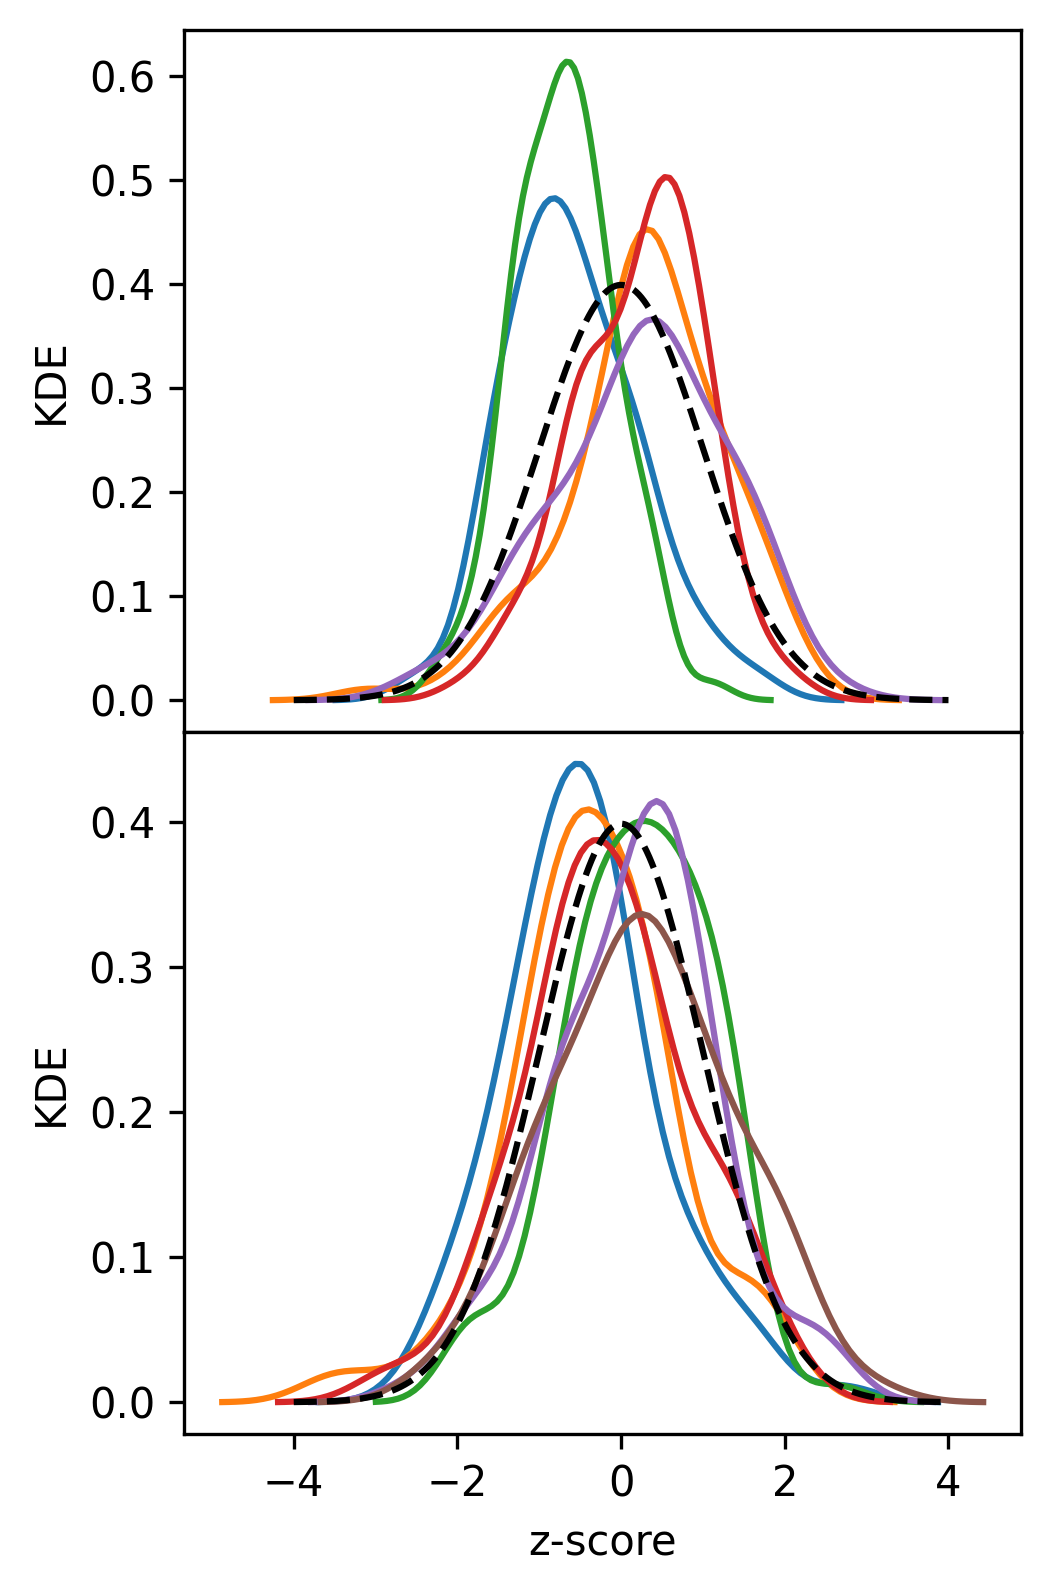

In [288]:
fig, axes = plt.subplots(2, 1, figsize=(3.6, 6.2), dpi=300, sharex=True,
                       gridspec_kw={'hspace': 0.0})

ax = axes[0]
for col, c in zip(z_cols[:5], [f'C{n}' for n in range(5)]):
    try:
        sns.distplot(df[col], color=c, hist=False, label=latex_cols[col[:-2]], ax=ax)
    except:
        pass
ax.plot(z, n01, 'k--', label=r'$\mathcal{N}(0, 1)$')
ax.set_ylabel('KDE')
# ax.legend(loc='upper left');
ax.get_legend().remove()

ax = axes[1]
for col in z_cols[5:]:
    sns.distplot(df[col], hist=False, label=latex_cols[col[:-2]], ax=ax)
ax.plot(z, n01, 'k--', label=r'$\mathcal{N}(0, 1)$')
ax.set_xlabel('z-score')
ax.set_ylabel('KDE')
# ax.legend(loc='upper left');
ax.get_legend().remove()

fig.savefig('../paper/figures/zscore_pp.png', bbox_inches='tight')

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


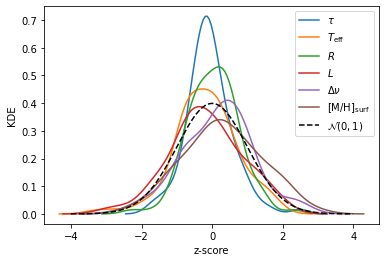

In [219]:
for col in z_cols[5:]:
    sns.distplot(df[col], hist=False, label=latex_cols[col[:-2]])
plt.plot(z, n01, 'k--', label=r'$\mathcal{N}(0, 1)$')
plt.xlabel('z-score')
plt.ylabel('KDE')
plt.legend()

In [220]:
obs_cols = ['teff', 'lum', 'dnu', 'mhs']

In [221]:
def zobs_score(data, col):
    return (data[f'{col}'] - data[f'{col}_true']) / data[f'{col}_err']

In [222]:
zobs_cols = []
for col in obs_cols:
    z_col = f'{col}_zobs'
    df[z_col] = zobs_score(df, col)
    zobs_cols.append(z_col)

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


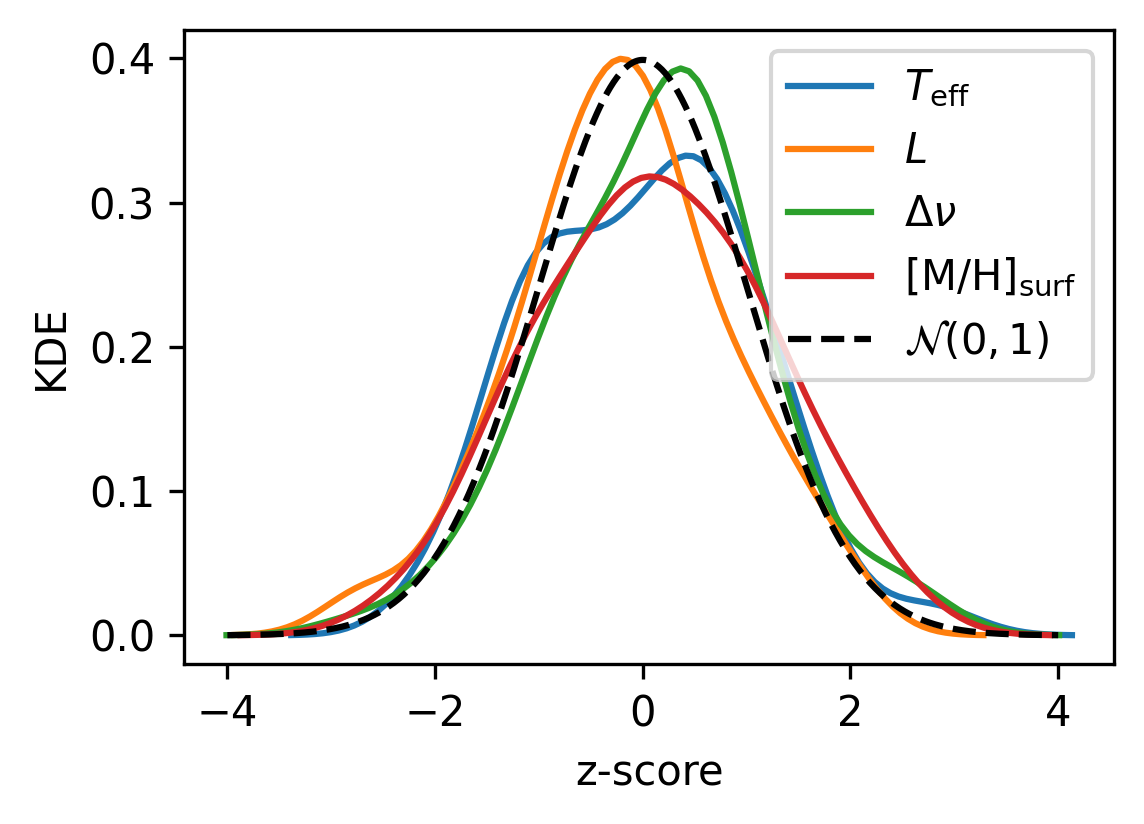

In [228]:
plt.figure(figsize=(4., 2.8), dpi=300)

for col in zobs_cols:
    sns.distplot(df[col], hist=False, label=latex_cols[col[:-5]])
plt.plot(z, n01, 'k--', label=r'$\mathcal{N}(0, 1)$')
plt.xlabel('z-score')
plt.ylabel('KDE')
plt.legend()

plt.savefig('../paper/figures/zscore_obs.png', bbox_inches='tight')

I will show why the no pooled stars model overestimates uncertainty

In [170]:
x = np.random.normal(0, 1, 100)

In [171]:
y = x.copy()

In [172]:
y[x > 1] = 1
y[x < -1] = -1

If you have a boundary in the posterior, and it is not Gaussian, this will artificially inflate the standard deviation with respect to the residule. It is not that the errors are too big, but more that the residules are too small due to boundary effects.

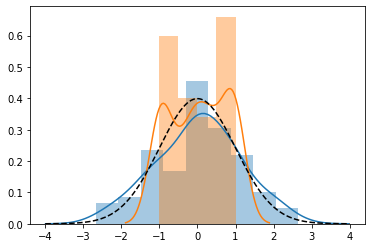

In [173]:
sns.distplot(x)
sns.distplot(y)
plt.plot(z, n01, 'k--', label=r'$\mathcal{N}(0, 1)$')